#1. Set up environment

In [ ]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os
from sklearn import preprocessing
import pandas as pd
import scipy.signal
import pickle
import csv

In [ ]:
# Connecting Google Colab to Google Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/corino/train

Mounted at /gdrive
/gdrive/.shortcut-targets-by-id/1VNycZC_xFFpxCAqmRhHpLYkv_K4xtGLO/corino/train



#1.1 Importing segments and their corresponding labels

In [ ]:
save_directory = '/gdrive/MyDrive/corino/Processing_definitivo'
# Change the current working directory
os.chdir(save_directory)

# Load the data from the files
with open('segmenti_totali_check_28_01.txt', 'rb') as data_file:
    segmenti_totali = pickle.load(data_file)
with open('label_check_28_01.txt', 'rb') as data_file:
    label = pickle.load(data_file)

Plot of some imported segments

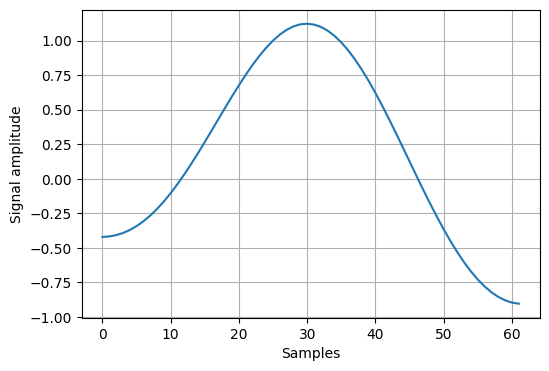

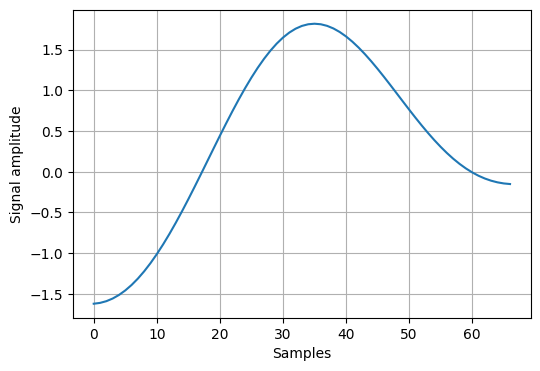

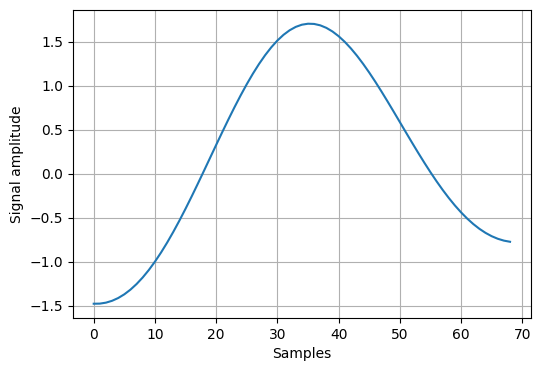

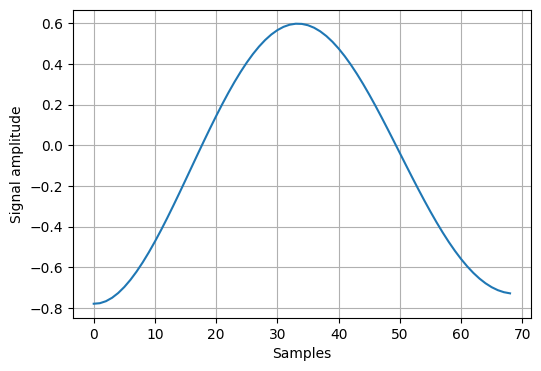

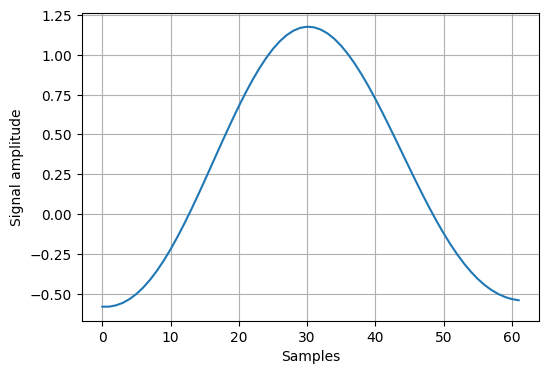

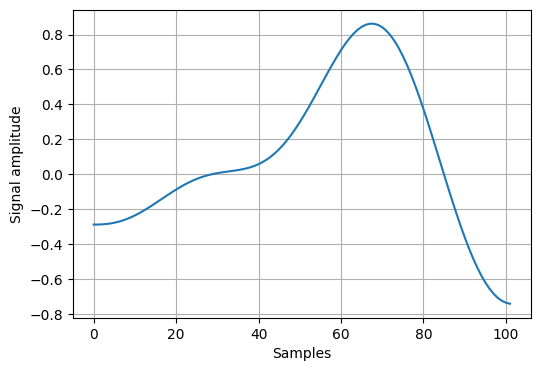

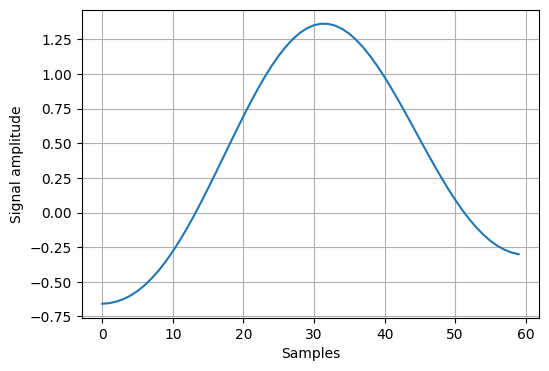

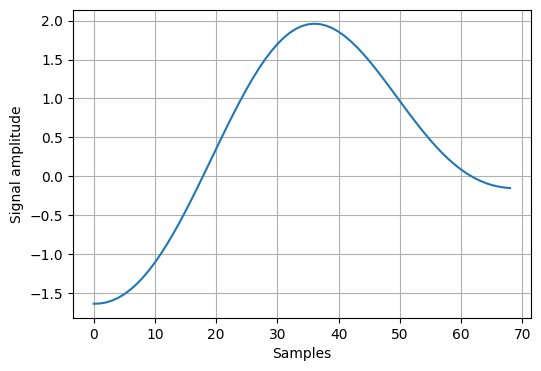

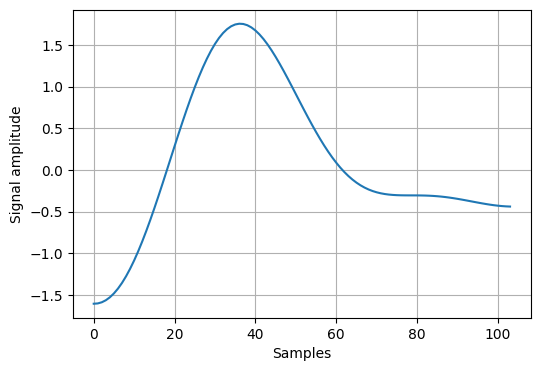

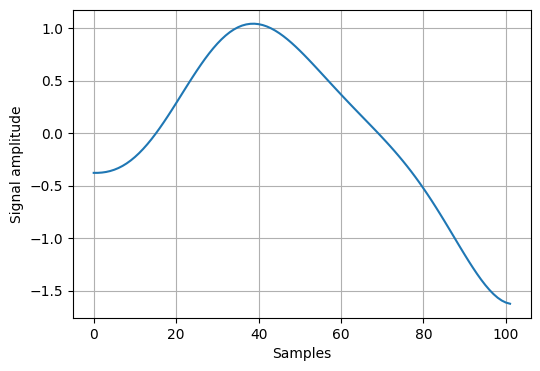

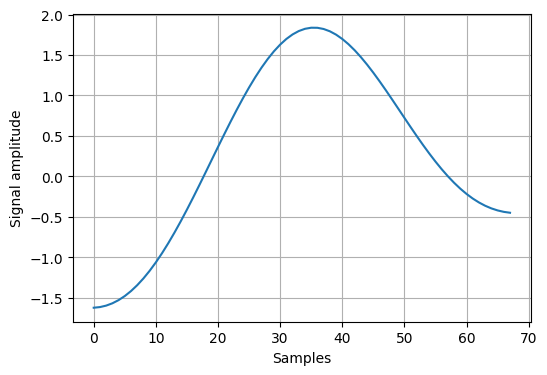

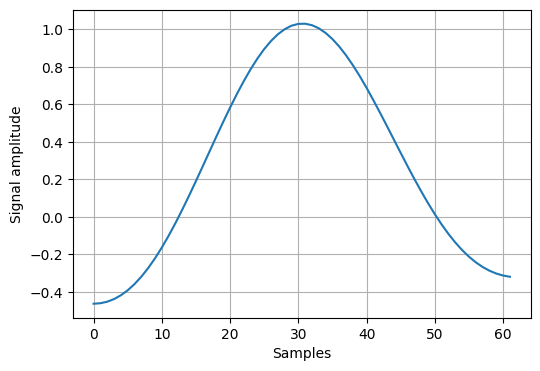

In [ ]:
for i in range(50,70):
  plt.figure(figsize = (13,4))
  plt.subplot(1,2,1)
  plt.plot(segmenti_totali[89][i])
  plt.xlabel('Samples')
  plt.ylabel('Signal amplitude')

  plt.grid()

#Delete parts of segment with many 0s, as an additional post preprocessing check



Since after artifact removal, there were parts of zero padding, there was a risk that for segmentation, it wouldn't take the true minimum immediately after the peak but its surroundings. So, to avoid this, we ensured to take the peak's surroundings that didn't include the zero padding.But applying the filter, the zero padding wasn't exactly 0 but assumed small values so we set a threshold close to 0, approximately 0.005

So, if the sample value was between -0.005 and 0.005, we start counting the samples, and if the number of consecutive samples is greater than 5, then we mark the indices. In this way, at the end, the segment is taken from when the zero padding ends, thus from the true minimum before the peak to the end of the segment

In [ ]:
indice=0
for i in range(len(segmenti_totali)):
  for j in range(len(segmenti_totali[i])):
    count=0
    for k in range(len(segmenti_totali[i][j])):
      if count>5 and indice == 0:
        if segmenti_totali[i][j][k]> 0.0005 or segmenti_totali[i][j][k]<-0.0005:
          indice = k
      if segmenti_totali[i][j][k] <0.0005 and segmenti_totali[i][j][k]>-0.0005:
        count+=1
      else:
        count=0
    if indice !=0:
      segmenti_totali[i][j] = segmenti_totali[i][j][indice:len(segmenti_totali[i][j])]
      indice=0


#1.2 Encoding labels

 Encoding the labels, setting N to 0 and V and S to 1, enabling binary classification

In [ ]:
label_modified = [
    np.where(arr == 'N', 0, arr) for arr in label
]

In [ ]:
label_modified1 = [
    np.where(arr == 'V', 1, arr) for arr in label_modified
]

In [ ]:
label_modified_final = [
    np.where(arr == 'S', 1, arr) for arr in label_modified1
]

In [ ]:
label_modified_final

[array(['0', '0', '0', ..., '0', '0', '0'], dtype='<U3'),
 array(['1', '0', '0', ..., '0', '0', '0'], dtype='<U3'),
 array(['0', '0', '0', ..., '0', '0', '0'], dtype='<U3'),
 array(['1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
        '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1',
        '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',
        '0', '0', '0', 

#2. Features extractions

For each patient, a set of features has been calculated. The features are computed on each segment of each patient, and in the end, we have a feature with the same size as the number of patients,but containing one value for each segment of the patient

# 2.1 Skewnes

In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.

-negative skew: The left tail is longer; the mass of the distribution is concentrated on the right

-positive skew: The right tail is longer; the mass of the distribution is concentrated on the left

-zero skew: A normal distribution (bell curve)

So we decide to use the skewness as a feature because it provides information about the shape of the data distribution.

In [ ]:
from scipy.stats import skew

In [ ]:
skewness_picchi = []
for i in range(len(segmenti_totali)):
    elementi_skewness = []
    for j in range(len(segmenti_totali[i])):
        skewness1 = skew(segmenti_totali[i][j])
        elementi_skewness.append(skewness1)
    skewness_picchi.append(elementi_skewness)

# 2.2 Kurtosis

Kurtosis is a measure that describes how heavily the tails of a distribution differ from the tails of a normal distribution.

If the kurtosis value is positive then it suggests heavy tails. Alternatively, a negative value means that there are light tails. The tail heaviness or lightness is in comparison with the normal distribution and it suggests whether the data distribution is flatter or less flat than the normal distribution

So we decide to use this feature because as skewnes provides information about the shape of the data distribution

In [ ]:
from scipy.stats import kurtosis

In [ ]:
kurtosis_picchi = []

for i in range(len(segmenti_totali)):
    elementi_kurtosis = []
    for j in range(len(segmenti_totali[i])):
        kurtosis1 = kurtosis(segmenti_totali[i][j])
        elementi_kurtosis.append(kurtosis1)
    kurtosis_picchi.append(elementi_kurtosis)

# 2.3 Standard deviation

Standard deviation is a measure of the amount of variation of a random variable expected about its mean.

 A low standard deviation indicates that the values tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the values are spread out over a wider range

In [ ]:
import statistics

In [ ]:
stdev_picchi = []

for i in range(len(segmenti_totali)):
    elementi_stdev = []
    for j in range(len(segmenti_totali[i])):
        stdev1 = statistics.stdev(segmenti_totali[i][j])
        elementi_stdev.append(stdev1)
    stdev_picchi.append(elementi_stdev)

# 2.4 Amplitude value

The segment's amplitude was calculated as the peak height, by taking the largest sample value within the segment. Amplitude was used because during the signal preprocessing phase, we noticed that N, V, S peaks showed different peak heights, especially V and S peaks showed lower heights compared to N peaks

In [ ]:
ampiezza_picchi = []

for i in range(len(segmenti_totali)):
    riga_ampiezze = []
    for j in range(len(segmenti_totali[i])):
        max_amp_in_segmento = np.max(segmenti_totali[i][j])
        riga_ampiezze.append(max_amp_in_segmento)
    ampiezza_picchi.append(riga_ampiezze)

# 2.5 Width value


The segment width was calculated by counting how many samples the segment consists of. This feature was also chosen because it provides information about the shape of the signal.

In [ ]:
larghezza_picchi = []

for i in range(len(segmenti_totali)):
    elementi_larghezza = []
    for j in range(len(segmenti_totali[i])):
        larg = len(segmenti_totali[i][j])
        elementi_larghezza.append(larg)
    larghezza_picchi.append(elementi_larghezza)

# 2.6 Mean Value

The mean provides a compact representation of the signal. It is a measure of central tendency of the signal

In [ ]:
media_picchi = []

for i in range(len(segmenti_totali)):
    elementi_media = []
    for j in range(len(segmenti_totali[i])):
        med = np.mean(segmenti_totali[i][j])
        elementi_media.append(med)
    media_picchi.append(elementi_media)

# 2.7 Slope

The slope provides information about the trend or pattern of the signal and about the steepness of the curve of the segment; it can indicate how quickly the signal rises or falls around its peak

In [ ]:
slopes= []

for i in range(len(segmenti_totali)):
    elementi_slopes = []
    for j in range(len(segmenti_totali[i])):
        sps = np.gradient(segmenti_totali[i][j])
        sp = np.mean(sps)
        elementi_slopes.append(sp)
    slopes.append(elementi_slopes)

# 3. Dataframe

We have created the dataframe containing all our features

We have created two dataframes, one for the training set containing 70 patients and one for the test set containing 21.

## 3.1. Train features

In [ ]:
import random
# Set seed for reproducibility.
seed_value = 42
random.seed(seed_value)

In [ ]:
import random
# Randomly extract 70 indexes from the array.
indici_train = random.sample(range(len(segmenti_totali)), 70)

In [ ]:
# Calculate unselected indexes
indici_non_selezionati = set(range(len(segmenti_totali))) - set(indici_train)

# Convert the set to a list
indici_test = list(indici_non_selezionati)


Concatenate the various feature from different patients.

So,in the end, we provide to the model a set of features, each corresponding to a single segment.

In [ ]:
skewness_train=[]
for i in range (len(indici_train)):
  skewness_train.extend(skewness_picchi[indici_train[i]])

In [ ]:
stdev_train=[]
for i in range (len(indici_train)):
  stdev_train.extend(stdev_picchi[indici_train[i]])

In [ ]:
slopes_train=[]
for i in range (len(indici_train)):
  slopes_train.extend(slopes[indici_train[i]])

In [ ]:
media_train=[]
for i in range (len(indici_train)):
  media_train.extend(media_picchi[indici_train[i]])

In [ ]:
larghezza_train=[]
for i in range (len(indici_train)):
  larghezza_train.extend(larghezza_picchi[indici_train[i]])

In [ ]:
amplitude_train=[]
for i in range (len(indici_train)):
  amplitude_train.extend(ampiezza_picchi[indici_train[i]])

In [ ]:
kurtosis_train=[]
for i in range (len(indici_train)):
  kurtosis_train.extend(kurtosis_picchi[indici_train[i]])

## 3.2. Test features

In [ ]:
skewness_test = []

for i in range(len(indici_test)):
    skewness_test.extend(skewness_picchi[indici_test[i]])


In [ ]:
kurtosis_test=[]
for i in range (len(indici_test)):
  kurtosis_test.extend(kurtosis_picchi[indici_test[i]])

In [ ]:
amplitude_test=[]
for i in range (len(indici_test)):
  amplitude_test.extend(ampiezza_picchi[indici_test[i]])

In [ ]:
larghezza_test=[]
for i in range (len(indici_test)):
  larghezza_test.extend(larghezza_picchi[indici_test[i]])

In [ ]:
media_test=[]
for i in range (len(indici_test)):
  media_test.extend(media_picchi[indici_test[i]])

In [ ]:
slope_test=[]
for i in range (len(indici_test)):
  slope_test.extend(slopes[indici_test[i]])

In [ ]:
stdev_test=[]
for i in range (len(indici_test)):
  stdev_test.extend(stdev_picchi[indici_test[i]])

## 3.4 Label

In [ ]:
label_train=[]
for i in range (len(indici_train)):
  label_train.extend(label_modified_final[indici_train[i]])

In [ ]:
label_test=[]
for i in range (len(indici_test)):
  label_test.extend(label_modified_final[indici_test[i]])

## 3.5 Dataframe train

Assemble the training dataset with all the features.

In [ ]:
data = {
    'Skewness': skewness_train,
    'Kurtosis': kurtosis_train,
    'Standard Deviation': stdev_train,
    'Amplitude': amplitude_train,
    'Larghezza': larghezza_train,
    'Media': media_train,
    'Slope': slopes_train,

}

train_df = pd.DataFrame(data)

In [ ]:
train_df

Skewness  Kurtosis  Standard Deviation  Amplitude  Larghezza     Media  \
0     -0.121141 -1.272831            0.646137   0.987912         67  0.091196   
1     -0.087324 -1.424448            0.751885   0.961161         82 -0.079904   
2     -0.022563 -1.459910            0.985019   1.473885         82  0.079717   
3     -0.390677 -0.981619            0.791774   1.090738         65  0.049238   
4     -0.965811 -0.265575            0.410192   0.479155         61  0.032206   
...         ...       ...                 ...        ...        ...       ...   
99260 -0.401557 -0.962441            0.990703   1.649003         59  0.356080   
99261 -0.388227 -1.010780            0.972870   1.530821         58  0.263732   
99262 -0.238974 -1.105825            0.948671   1.687153         60  0.389938   
99263 -0.661739 -0.829387            1.093030   1.629300         57  0.350200   
99264 -0.710411 -1.043922            0.777276   0.730187         49 -0.062316   

          Slope  
0     -0.008163  
1     -0.002959  
2     -0.001239  
3      0.016614  
4     -0.015204  
...         ...  
99260  0.023180  
99261  0.022185  
99262  0.017920  
99263  0.034851  
99264  0.033590  

[99265 rows x 7 columns]

## Features selection


We have plotted the correlation matrix among all the features present in our training set to identify the most correlated ones.

In [ ]:
def plot_correlationMatrix(correlation_matrix, features):
    f = plt.figure(figsize=(10, 8))
    plt.matshow(correlation_matrix, fignum=f.number)
    plt.xticks(range(len(features)), features, fontsize=10, rotation=90)
    plt.yticks(range(len(features)), features, fontsize=10)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    return

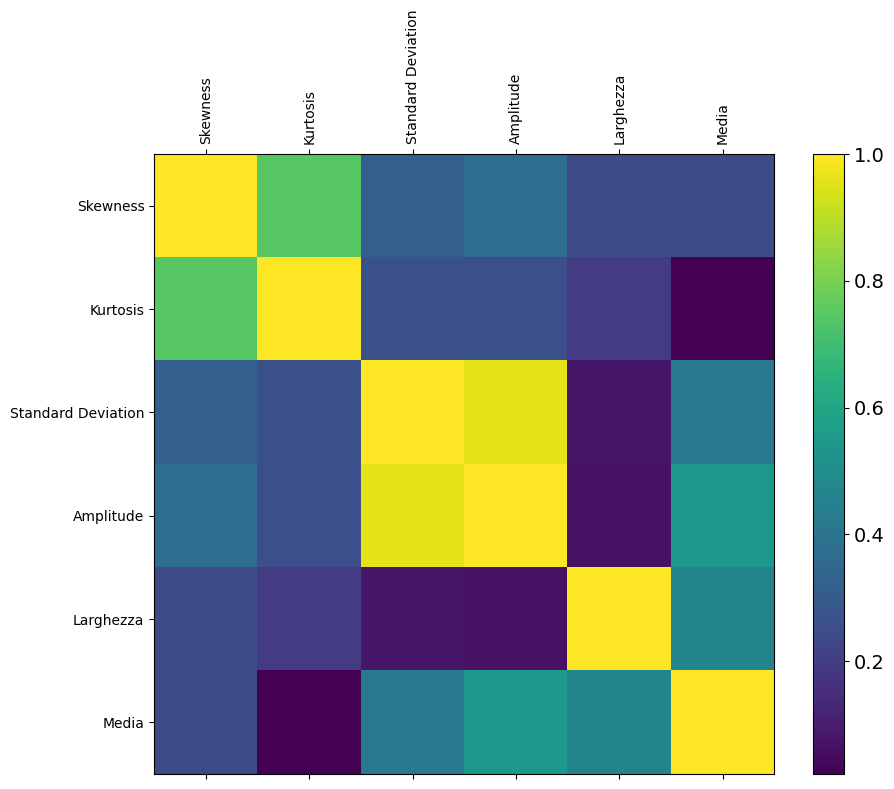

In [ ]:
train_features = train_df.iloc[:,:-1]
cor_matrix = train_features.corr().abs()
feature_list = train_features.columns
plot_correlationMatrix(cor_matrix, feature_list)


It can be noticed from the correlation matrix that the amplitude feature and the standard deviation are strongly correlated. For this reason, we have decided not to use the standard deviation feature since we believe that amplitude is more important. In our experiments with the models, we noticed that the performance of our model is better when we use amplitude instead of standard deviation. This may be due to the fact that in the signal, amplitude shows significant differences between the various classes.

We decide to not use correlated feature bacuse it helps us avoid redundancy in our data. When features are highly correlated, they often convey the same information to the model, leading to unnecessary complexity without improving performance.

Moreover, having uncorrelated features enhances our model's interpretability. We can better understand the unique contributions of each feature when they aren't tightly intertwined.

Furthermore, using uncorrelated features reduces the risk of overfitting. By avoiding spurious relationships between features, our model is less likely to memorize the training data and more likely to generalize well to unseen data.


We create our dataframe without the standard deviation feature

In [ ]:
data = {
    'Skewness': skewness_train,
    'Kurtosis': kurtosis_train,
    'Amplitude': amplitude_train,
    'Larghezza': larghezza_train,
    'Media': media_train,
    'Slope': slopes_train,
    'Label': label_train
}

train_df = pd.DataFrame(data)

In [ ]:
train_df

Skewness  Kurtosis  Amplitude  Larghezza     Media     Slope Label
0     -0.121141 -1.272831   0.987912         67  0.091196 -0.008163     0
1     -0.087324 -1.424448   0.961161         82 -0.079904 -0.002959     0
2     -0.022563 -1.459910   1.473885         82  0.079717 -0.001239     0
3     -0.390677 -0.981619   1.090738         65  0.049238  0.016614     0
4     -0.965811 -0.265575   0.479155         61  0.032206 -0.015204     0
...         ...       ...        ...        ...       ...       ...   ...
99260 -0.401557 -0.962441   1.649003         59  0.356080  0.023180     0
99261 -0.388227 -1.010780   1.530821         58  0.263732  0.022185     0
99262 -0.238974 -1.105825   1.687153         60  0.389938  0.017920     0
99263 -0.661739 -0.829387   1.629300         57  0.350200  0.034851     0
99264 -0.710411 -1.043922   0.730187         49 -0.062316  0.033590     0

[99265 rows x 7 columns]

## 5.9 Test dataframe

In [ ]:
test_df = {
    'Skewness': skewness_test,
    'Kurtosis': kurtosis_test,
    'Amplitude': amplitude_test,
    'Larghezza': larghezza_test,
    'Media': media_test,
    'Slope': slope_test,
    'Label': label_test
    }
test_df = pd.DataFrame(test_df)

In [ ]:
test_df

Skewness  Kurtosis  Amplitude  Larghezza     Media     Slope Label
0     -0.092255 -1.324259   0.810771         56  0.169451  0.005931     1
1     -0.113935 -1.288470   0.885127         55  0.261773  0.006896     0
2     -0.191555 -1.192720   1.242699         56  0.168956  0.013623     0
3      0.006700 -1.405299   1.272256         58  0.226017  0.006719     0
4      0.064747 -1.456299   1.197218         60  0.322909  0.003684     0
...         ...       ...        ...        ...       ...       ...   ...
32465 -0.499707  0.025393   0.603550        102  0.047355  0.006308     0
32466 -0.041389 -1.206176   0.809671         84 -0.021488 -0.008269     1
32467 -0.579417 -0.830836   1.026623         66  0.240959  0.016565     0
32468 -0.110982 -1.252573   1.686614         68  0.280022  0.012986     0
32469 -0.501262 -1.358090   0.322538         41 -0.035361  0.019874     0

[32470 rows x 7 columns]

#4. Data Manipulation

##4.1. Remove Nan

In [ ]:
train_df.isna().any()

Skewness     False
Kurtosis     False
Amplitude    False
Larghezza    False
Media        False
Slope        False
Label        False
dtype: bool

In [ ]:
test_df.isna().any()

Skewness     False
Kurtosis     False
Amplitude    False
Larghezza    False
Media        False
Slope        False
Label        False
dtype: bool


In the test and train dataframes, there are no missing values.

# 4.2 Count label

In [ ]:
# Count the occurrences of zeros and ones in the 'label' column.
conteggio_label = train_df['Label'].value_counts()

print("Conteggio delle ricorrenze nella colonna 'label':")
print(conteggio_label)

Conteggio delle ricorrenze nella colonna 'label':
0    92107
1     7158
Name: Label, dtype: int64


In [ ]:
# Count the occurrences of zeros and ones in the 'label' column.
conteggio_label = test_df['Label'].value_counts()

print("Conteggio delle ricorrenze nella colonna 'label':")
print(conteggio_label)

Conteggio delle ricorrenze nella colonna 'label':
0    29478
1     2992
Name: Label, dtype: int64


## Plot of classes distribution in train and test set

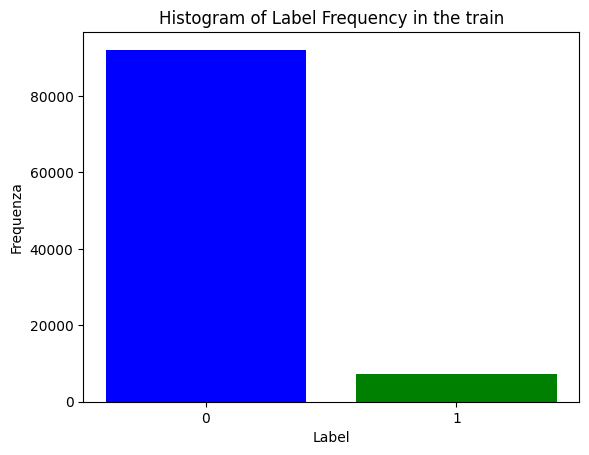

In [ ]:
labels_column = train_df["Label"]
conteggio_labels = labels_column.value_counts()
etichette = conteggio_labels.index
valori = conteggio_labels.values
plt.bar(etichette, valori, color=['blue', 'green'])
plt.title('Histogram of Label Frequency in the train')
plt.xlabel('Label')
plt.ylabel('Frequenza')
plt.show()

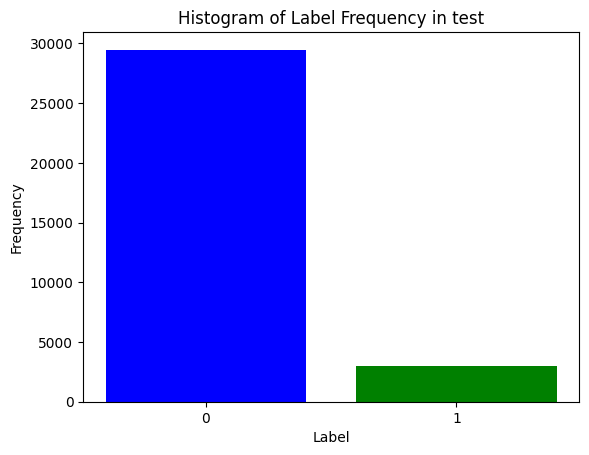

In [ ]:
labels_column = test_df["Label"]
conteggio_labels = labels_column.value_counts()
etichette = conteggio_labels.index
valori = conteggio_labels.values
plt.bar(etichette, valori, color=['blue', 'green'])
plt.title('Histogram of Label Frequency in test')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

#4.3 Downsampling

Since the number of class N is much greater than the number of classes V + S, we have decided to apply downsampling of the majority class to achieve more balanced classes

We have decided to not use an equal number of samples for the first and second classes to avoid losing too many samples for model training. The ratio has been empirically determined based on the model's performance.

In [ ]:
from sklearn.utils import resample

# Suppose 'Label' is the column you want to convert to numeric type.
train_df['Label'] = pd.to_numeric(train_df['Label'])

print(train_df['Label'].dtype)


int64


In [ ]:
class_majority = train_df[train_df['Label'] == 0] #creation of dataframe for class 0
class_majority = class_majority.reset_index(drop=True)
class_minority = train_df[train_df['Label'] == 1] #creation of dataframe for class 1
class_minority = class_minority.reset_index(drop=True)

# Downsampling of the majority class
class_majority = class_majority[0:len(class_minority)*5]
# we select to have the majority class 5 times larger than the minority class.

# Concatenation of the downsampled dataframe
train_df_downsampled = pd.concat([class_majority, class_minority])

In [ ]:
train_df_downsampled

Skewness  Kurtosis  Amplitude  Larghezza     Media     Slope  Label
0    -0.121141 -1.272831   0.987912         67  0.091196 -0.008163      0
1    -0.087324 -1.424448   0.961161         82 -0.079904 -0.002959      0
2    -0.022563 -1.459910   1.473885         82  0.079717 -0.001239      0
3    -0.390677 -0.981619   1.090738         65  0.049238  0.016614      0
4    -0.965811 -0.265575   0.479155         61  0.032206 -0.015204      0
...        ...       ...        ...        ...       ...       ...    ...
7153 -0.344575 -1.039778   0.449027         62  0.086192  0.005112      1
7154 -0.388326 -0.999643   0.445593         66  0.070254  0.005576      1
7155 -0.300238 -1.130561   0.492247         67  0.075606  0.005691      1
7156 -0.262936 -1.141358   0.210489         51  0.019166  0.002993      1
7157 -0.128963 -1.369562   0.310627         55 -0.093438 -0.003310      1

[42948 rows x 7 columns]

In [ ]:
train_df_downsampled = train_df_downsampled.sample(frac=1, random_state=42)
#We use this line of code to shuffle the dataframe so that we don't have all the 0s followed by all the 1s in order

In [ ]:
train_df_downsampled

Skewness  Kurtosis  Amplitude  Larghezza     Media     Slope  Label
2628   0.137788 -1.508236   0.483691         63  0.054662  0.000451      1
29390 -0.744614 -0.891681   0.625681         49 -0.055401  0.026973      0
31152 -0.007688 -1.497042   1.272270         65 -0.016641  0.000069      0
4772   0.186251 -1.148175   1.619532        115 -0.006225  0.000070      0
7369  -0.073871 -1.317660   1.415358        118  0.007825 -0.000185      0
...         ...       ...        ...        ...       ...       ...    ...
6265  -0.371364 -1.029300   1.728596         63  0.343460  0.021975      0
11284  0.193626 -1.158954   1.625576        105  0.029127 -0.000280      0
2368  -0.114054 -1.058659   0.794732        105 -0.100282 -0.003476      1
860   -0.048808 -1.442267   1.155972         77 -0.070708  0.003680      0
15795 -0.039860 -1.415113   0.929244         82 -0.012192 -0.002506      0

[42948 rows x 7 columns]

In [ ]:
train_df_downsampled = train_df_downsampled.reset_index(drop=True)
#We use this line of code to reset the indices so that they start from 0

In [ ]:
train_df_downsampled

Skewness  Kurtosis  Amplitude  Larghezza     Media     Slope  Label
0      0.137788 -1.508236   0.483691         63  0.054662  0.000451      1
1     -0.744614 -0.891681   0.625681         49 -0.055401  0.026973      0
2     -0.007688 -1.497042   1.272270         65 -0.016641  0.000069      0
3      0.186251 -1.148175   1.619532        115 -0.006225  0.000070      0
4     -0.073871 -1.317660   1.415358        118  0.007825 -0.000185      0
...         ...       ...        ...        ...       ...       ...    ...
42943 -0.371364 -1.029300   1.728596         63  0.343460  0.021975      0
42944  0.193626 -1.158954   1.625576        105  0.029127 -0.000280      0
42945 -0.114054 -1.058659   0.794732        105 -0.100282 -0.003476      1
42946 -0.048808 -1.442267   1.155972         77 -0.070708  0.003680      0
42947 -0.039860 -1.415113   0.929244         82 -0.012192 -0.002506      0

[42948 rows x 7 columns]

## Look at class distribution after downsampling

In [ ]:
# Count the occurrences of zeros and ones in the 'label' column.
conteggio_label = train_df_downsampled['Label'].value_counts()

print("Conteggio delle ricorrenze nella colonna 'label':")
print(conteggio_label)

Conteggio delle ricorrenze nella colonna 'label':
0    35790
1     7158
Name: Label, dtype: int64


## 4.4 Normalization


We have decided to normalize the features since they may have different scales, which could lead to convergence issues during model training. Normalization reduces the scale differences between features, allowing the model to learn more effectively

As normalization, we have used the MinMaxScaler, which performs a transformation as reported in the formula:

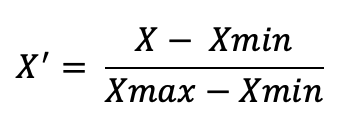

 it linearly scales the data down into a fixed range

We fit the MinMaxScaler to the traning data, and then transformed both the training and the test data.

###  Train Normalization with MinMax Scaler

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_normalize = train_df_downsampled.columns.difference(['Label'])
train_df_downsampled[cols_to_normalize] = scaler.fit_transform(train_df_downsampled[cols_to_normalize])

In [ ]:
train_df_downsampled

Skewness  Kurtosis  Amplitude  Larghezza     Media     Slope  Label
0      0.819092  0.017700   0.162164   0.191257  0.492880  0.393393      1
1      0.569435  0.084444   0.222241   0.114754  0.383727  0.651650      0
2      0.777932  0.018912   0.495815   0.202186  0.422166  0.389669      0
3      0.832803  0.056678   0.642743   0.475410  0.432496  0.389683      0
4      0.759207  0.038330   0.556356   0.491803  0.446430  0.387199      0
...         ...       ...        ...        ...       ...       ...    ...
42943  0.675038  0.069546   0.688888   0.191257  0.779291  0.602981      0
42944  0.834890  0.055511   0.645300   0.420765  0.467556  0.386267      0
42945  0.747838  0.066368   0.293767   0.420765  0.339217  0.355149      1
42946  0.766298  0.024841   0.446609   0.267760  0.368546  0.424834      0
42947  0.768830  0.027781   0.350679   0.295082  0.426579  0.364596      0

[42948 rows x 7 columns]

In [ ]:
train_df_downsampled.isna().any()

Skewness     False
Kurtosis     False
Amplitude    False
Larghezza    False
Media        False
Slope        False
Label        False
dtype: bool

In [ ]:
cols_to_normalize = test_df.columns.difference(['Label'])
test_df[cols_to_normalize] = scaler.transform(test_df[cols_to_normalize])

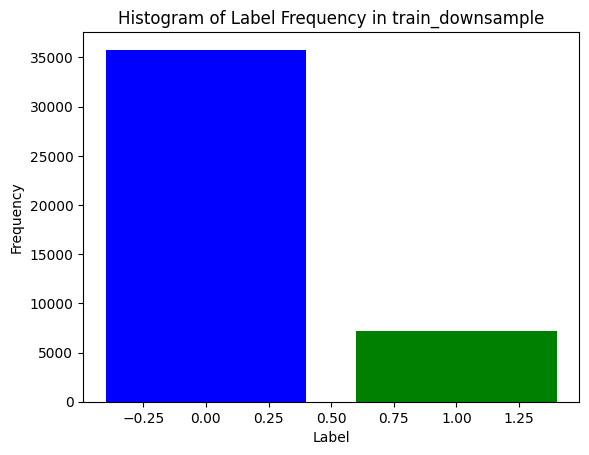

In [ ]:
labels_column = train_df_downsampled["Label"]
conteggio_labels = labels_column.value_counts()
etichette = conteggio_labels.index
valori = conteggio_labels.values
plt.bar(etichette, valori, color=['blue', 'green'])
plt.title('Histogram of Label Frequency in train_downsample')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

###  Test Normalization

In [ ]:
test_df

Skewness  Kurtosis  Amplitude  Larghezza     Media     Slope Label
0      0.754006  0.037616   0.300553   0.153005  0.606720  0.446755     1
1      0.747872  0.041490   0.332013   0.147541  0.698279  0.456151     0
2      0.725911  0.051856   0.483304   0.153005  0.606229  0.521649     0
3      0.782003  0.028843   0.495809   0.163934  0.662818  0.454421     0
4      0.798426  0.023322   0.464060   0.174863  0.758910  0.424866     0
...         ...       ...        ...        ...       ...       ...   ...
32465  0.638726  0.183721   0.212877   0.404372  0.485633  0.450425     0
32466  0.768397  0.050399   0.300087   0.306011  0.417360  0.308478     1
32467  0.616174  0.091031   0.391881   0.207650  0.677637  0.550297     0
32468  0.748707  0.045376   0.671126   0.218579  0.716378  0.515449     0
32469  0.638286  0.033954   0.093979   0.071038  0.403602  0.582524     0

[32470 rows x 7 columns]

#5. Classification

Convert the label to numeric type both for the train and test

In [ ]:
train_df_downsampled['Label'] = pd.to_numeric(train_df_downsampled['Label'])
print(train_df_downsampled['Label'].dtype)

int64


In [ ]:
test_df['Label'] = pd.to_numeric(test_df['Label'])
print(test_df['Label'].dtype)

int64


We separate the features and labels so that we can train the model.

In [ ]:
X_train = train_df_downsampled.iloc[:,:-1]
y_train = train_df_downsampled.iloc[:,-1]


In [ ]:
X_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score

The provided code defines a function named hyperp_search that conducts hyperparameter tuning for a given classifier using Grid Search Cross-Validation. It searches through a specified parameter grid and evaluates each combination using 3-fold cross-validation. The function then prints out the best F1 score achieved during the search, along with the corresponding optimal parameters. Additionally, it evaluates the performance of the best model on both the training and test datasets, providing metrics such as F1 score, precision, recall, and accuracy, along with their respective confusion matrices.

In [ ]:
# Hyperplane search

def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_traind: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    print("f1         train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) ))
    print("precision  train %.3f   test %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) ))
    print('recall     train %.3f   test %.3f' % (recall_score(y_train, y_pred_train), recall_score(y_test, y_pred) ))
    print("accuracy   train %.3f   test %.3f" % (accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred)))
    print(confusion_matrix(y_test, y_pred))

#5.1 Support vector classifier

Definition of the hyperparameters of the support vector machine where we will apply grid search cross-validation

In [ ]:
from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['rbf'],
              'C':[0.1,1,12],
              "max_iter":[-1],
              "degree":[1],
              "gamma":[13,20,30],
              "class_weight": [{0:1, 1: 1.2}]
              }


hyperp_search(classifier,parameters)

f1_traind: 0.817606 using {'C': 12, 'class_weight': {0: 1, 1: 1.2}, 'degree': 1, 'gamma': 30, 'kernel': 'rbf', 'max_iter': -1}
f1         train 0.833   test 0.660
precision  train 0.902   test 0.619
recall     train 0.773   test 0.707
accuracy   train 0.948   test 0.933
[[28177  1301]
 [  878  2114]]


#5.2 Logistic Regression

Definition of the hyperparameters of the logistic regression where we will apply grid search cross-validation

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10,0.05,0.04,0.06,11,0.07,50], "max_iter":[2000], "solver":['newton-cg','saga'] }


hyperp_search(classifier,parameters)

f1_traind: 0.601397 using {'C': 50, 'max_iter': 2000, 'solver': 'newton-cg'}
f1         train 0.602   test 0.515
precision  train 0.693   test 0.495
recall     train 0.532   test 0.536
accuracy   train 0.883   test 0.907
[[27843  1635]
 [ 1387  1605]]


# 5.3 Random Forest

Definition of the hyperparameters of the Random Forest where we will apply grid search cross-validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier()
parameters = {'n_estimators' : [40,50, 100],
    'criterion' : ['entropy', 'gini'],
             'max_depth' : [1,2,3],
             'min_samples_split' : [4,5,10,20,30,40],
              'min_samples_leaf' : [4,5,10]
             }
hyperp_search(classifier,parameters)

f1_traind: 0.728258 using {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 4, 'n_estimators': 40}
f1         train 0.714   test 0.612
precision  train 0.845   test 0.624
recall     train 0.618   test 0.600
accuracy   train 0.917   test 0.930
[[28399  1079]
 [ 1198  1794]]
